Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2026.

# Matplotlib

Matplotlib es una biblioteca para realizar gráficos con Python y NumPy. El mejor punto de partida es ir a la
lista de [ejemplos](https://matplotlib.org/gallery/index.html) que existen en la página web y encontrar uno
que se parezca al resultado deseado, cada uno de ellos contiene el código usado.

El siguiente comando _mágico_ permite tener gráficos interactivos en Notebooks de Jupyter.

Para que funcione, debemos instalar el paquete ``ipympl``. Esto puede hacerse ejecutando
lo siguiente en una terminal

```bash
conda install -c conda-forge ipympl
```


In [1]:
%matplotlib ipympl

Dentro de Matplotlib está ``pyplot`` que permite realizar muchos gráficos de manera sencilla.
Para comenzar a usarlo debemos importar el módulo.

In [2]:
from matplotlib import pyplot as plt

## Un gráfico sencillo

Realicemos un gráfico sencillo, inicialmente

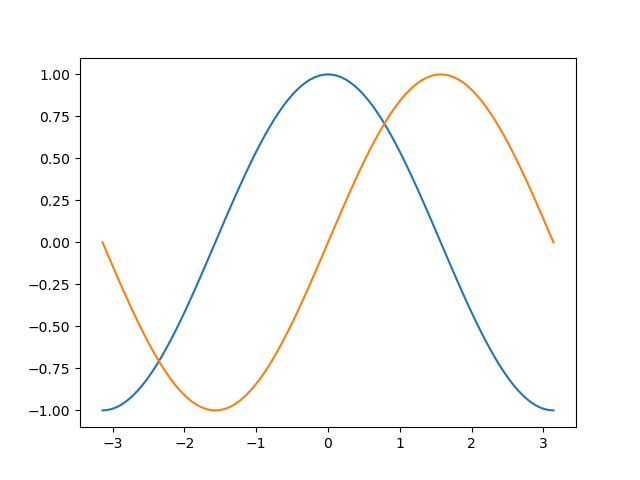

In [3]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 101)
cos = np.cos(x)
sin = np.sin(x)

plt.figure()
plt.plot(x, cos)
plt.plot(x, sin)

plt.show()


### Modifiquemos este gráfico

Ahora, vamos a modificar algunos detalles de este gráfico.

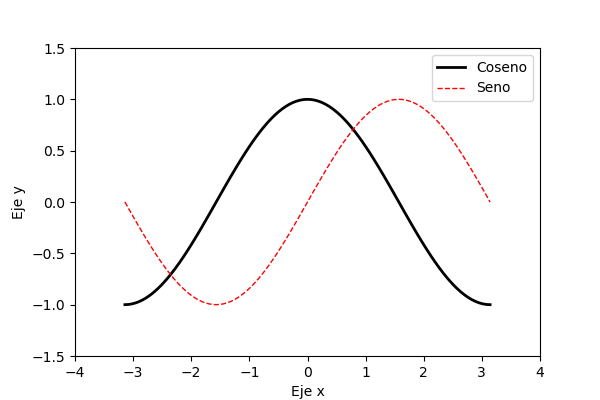

In [4]:
# Creemos una figura de 6×4 in²
plt.figure(figsize=(6, 4))

# Usemos una línea solida,negra para el coseno de grosor 3
# y una línea punteada,roja para el coseno de grosor 1
plt.plot(x, cos, color="black", linestyle="solid", linewidth=2)
plt.plot(x, sin, color="red", linestyle="dashed", linewidth=1)

# Limitemos los ejes
plt.xlim(-4.0, 4.0)
plt.ylim(-1.5, 1.5)

# Asignemos nombre a cada eje
plt.xlabel("Eje x")
plt.ylabel("Eje y")

# Creemos una leyenda
plt.legend(["Coseno", "Seno"])

# Mostremos los resultados
plt.show()


## Subplots

Matplotlib nos permite organizar varios sub-gráficos (``axes``) en una rejilla usando la
función ``subplot``.

``subplot`` recibe como parámetros:

- Número de sub-gráficos (``axes``) en la dirección horizontal.
- Número de sub-gráficos (``axes``) en la dirección vertical.
- Sub-gráfico (``axes``) actual.

Veamos un ejemplo

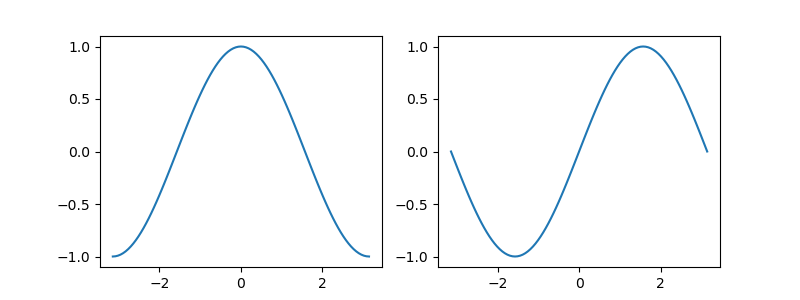

In [5]:
plt.figure(figsize=(8, 3))

# Usemos una rejila 2×1

# Primer sub-gráfico
plt.subplot(1, 2, 1)
plt.plot(x, cos)

# Segundo sub-gráfico
plt.subplot(1, 2, 2)
plt.plot(x, sin)

plt.show()

## Otros tipos de gráficos

### Gráficos de dispersión

Un gráfico de dispersión es un tipo de gráfico que utiliza coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos. Los datos se presentan como una colección de puntos.

Mostremos un ejemplo con 1024 puntos aleatorios en el que el color de cada punto dependa del ángulo.

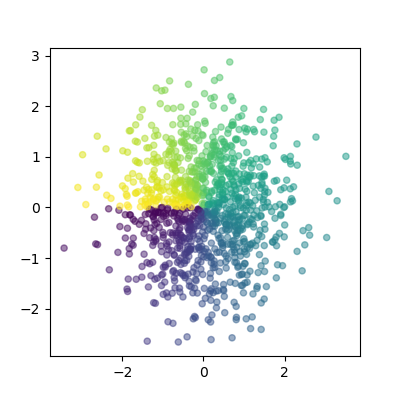

In [6]:
# Definimos las coordenadas aleatoriamente
n = 1024
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

# Calculamos el ángulo usando  la función arcotangente
# que devuelve el ángulo en [-pi, pi]
angle = np.arctan2(y, x)

plt.figure(figsize=(4, 4))
plt.scatter(x, y, 20, angle, alpha=0.5)

### Gráfico de barras

Un gráfico de barras usa barras rectangulares que son proprcionales a los valores que representan. Uno de los ejes
presenta las categorías que se comparan, mientras el otro eje representa los valores.

Los gráficos de barras se utilizan en la presentación de datos categóricos. Estos datos están agrupados
en conjuntos discretos, como meses del año, grupos de edad, o tamaños de zapatos.

Como ejemplo, grafiquemos los suicidios por edad en Colombia durante 2015. Los datos se obtuvieron de
[www.datos.gov.co](https://www.datos.gov.co/Estad-sticas-Nacionales/Suicidios-seg-n-Edad-/3nc9-zxcb/data).

In [7]:
edad = np.array(['80 y más', '75 a 79', '70 a 74',
                 '65 a 69', '60 a 64', '55 a 59',
                 '50 a 54', '45 a 49', '40 a 44',
                 '35 a 39', '30 a 34', '25 a 29',
                 '20 a 24', '18 a 19', '15 a 17',
                 '10 a 14'])
hombres = np.array([ 52,  33,  50,  62,  77,  99, 101,
                    134, 100, 145, 148, 191, 231, 95,
                    100,  37])
mujeres = np.array([ 6,  1,  4,  8, 13, 17, 22, 20, 19,
                    27, 41, 53, 71, 29, 49, 33])

Podemos usar la función ``plt.bar`` para realizar gráficos de barras verticales y ``plt.barh``
para realizar gráficos de barras horizontales.

El primer argumento se refiere a la posición (numérica) de cada dato. En este caso, usaremos
un número para cada valor, que podemos calcular usando 

````python
posiciones = range(len(edad))
````

Mostraremos el ejemplo con barras horizontales, que permiten mejor leer los rangos de edad
en este caso.

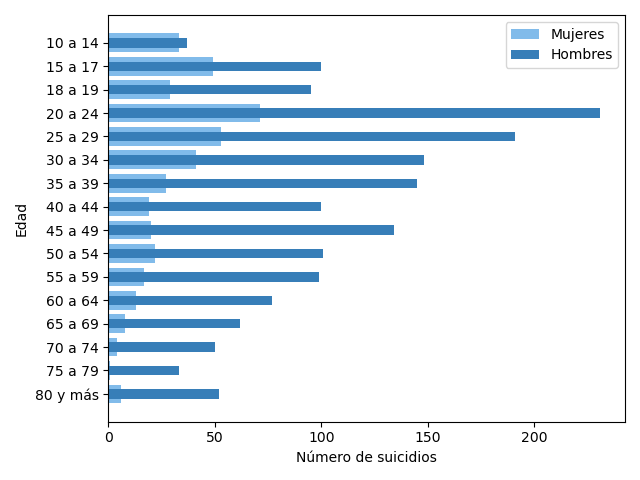

In [8]:
plt.figure()
posiciones = range(len(edad))

# El parámetro opcional tick_label nos permite añadir cada rango de edades
plt.barh(posiciones, mujeres, tick_label=edad, color="#81bbea")

# Modificamos el alto de las barras para que no cubran las barras anteriores
plt.barh(posiciones, hombres, tick_label=edad, height=0.4, color="#377eb8")
plt.xlabel("Número de suicidios")
plt.ylabel("Edad")
plt.legend(["Mujeres", "Hombres"])

# El próximo comando obliga a Matplotlib a mostrar el gráfico completo
plt.tight_layout()

### Gráfico de contornos

Un gráfico de contornos permite representar la relación entre tres variables numéricas en dos dimensiones.
Dos de las variables representan los ejes X e Y, y la tercera variable representa el nivel de os contornos.
Los contornos se grafican como curvas (``plt.contour``); el área entre las curvas de nivel puede
colorearse como una representación alternativa (``plt.contourf``).

Probemos con la siguiente función

$$f(x, y) = \left(1 - \frac{x}{2} + x^5 + y^3\right) e^{-x^2 - y^2}$$

In [9]:
def f(x, y):
    return (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

Este tipo de gráficos requiere que tengamos una rejilla, es decir, que tengamos los pares
$(x, y)$ para evaluar la función $f(x, y)$. NumPy nos permite hacer esto con la función
``meshgrid``.

In [10]:
x = np.linspace(1, 5, 5)
y = np.linspace(1, 5, 5)
print("x:\n", x)
print("y:\n",y)

X, Y = np.meshgrid(x, y)
print("X:\n", X)
print("Y:\n", Y)

x:
 [1. 2. 3. 4. 5.]
y:
 [1. 2. 3. 4. 5.]
X:
 [[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
Y:
 [[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]]


Veamos un ejemplo completo.

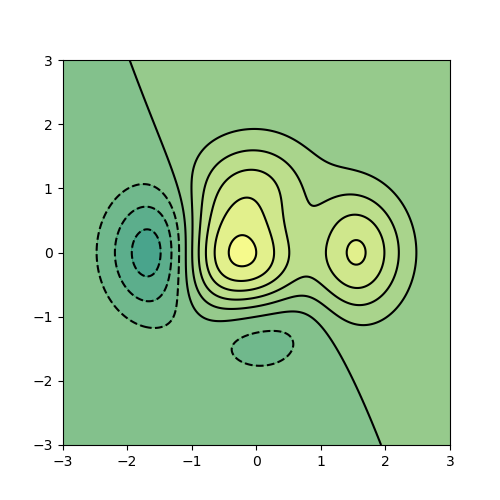

In [11]:
n = 256
# Creamos los valores de x e y en donde queremos evaluar la función
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# Meshgrid los combina
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(5, 5))
plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap="summer")
plt.contour(X, Y, f(X, Y), 8, colors='black')

### Gráficos de campos vectoriales

Presentamos dos métodos para graficar campos vectoriales. Uno de ellos consiste en ubicar flechas
con diferentes magnitudes y direcciones en varios puntos del espacio y la otra usa líneas de corriente

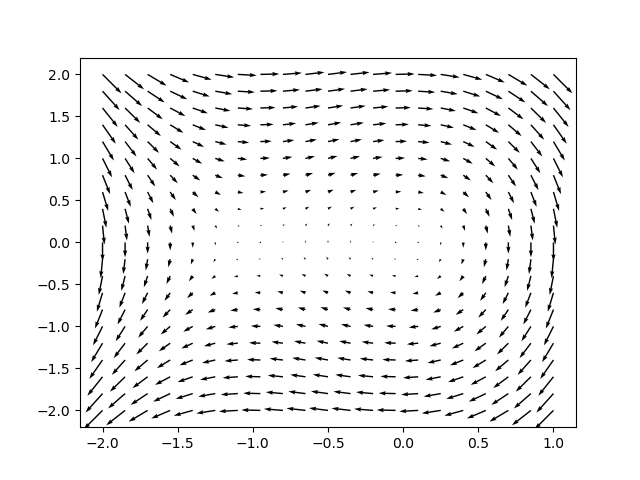

In [12]:
x = np.linspace(-2, 1, 21)
y = np.linspace(-2, 2, 21)
X, Y = np.meshgrid(x, y)
U = Y
V = -X - X**2

plt.figure()
plt.quiver(X, Y, U, V)

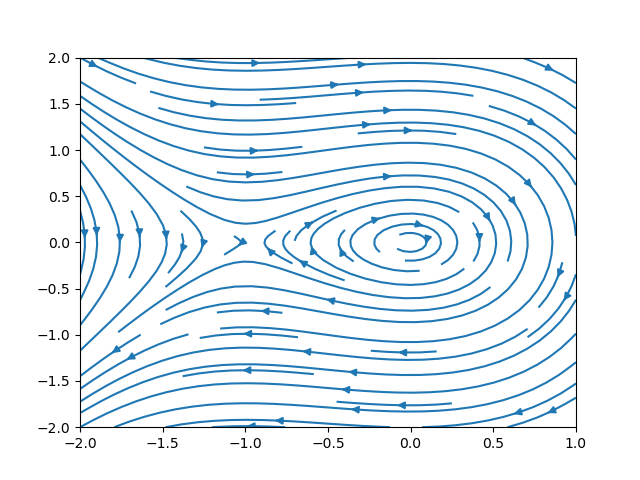

In [13]:
x = np.linspace(-2, 1, 21)
y = np.linspace(-2, 2, 21)
X, Y = np.meshgrid(x, y)
U = Y
V = -X - X**2

plt.figure()
plt.streamplot(X, Y, U, V)

### Gráficos 3D

Matplotlib ofrece la capacidad de realizar gráficos 3D. Para ello, debemos crear un
_axes_ (contenedor de gráficos) con proyección 3D como se muestra a continuación.

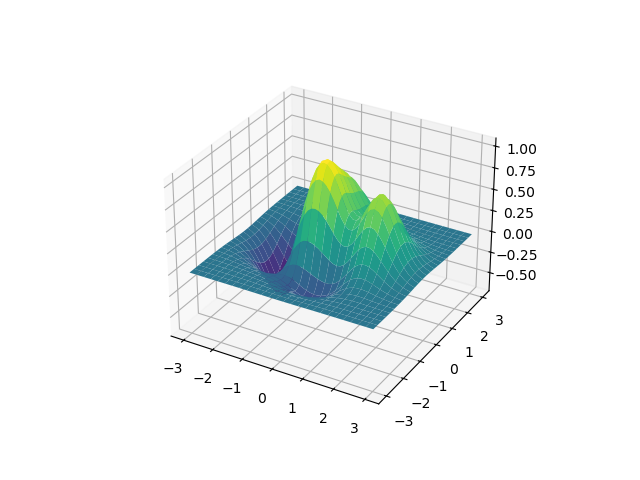

In [14]:
n = 51
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X,Y), cmap="viridis")

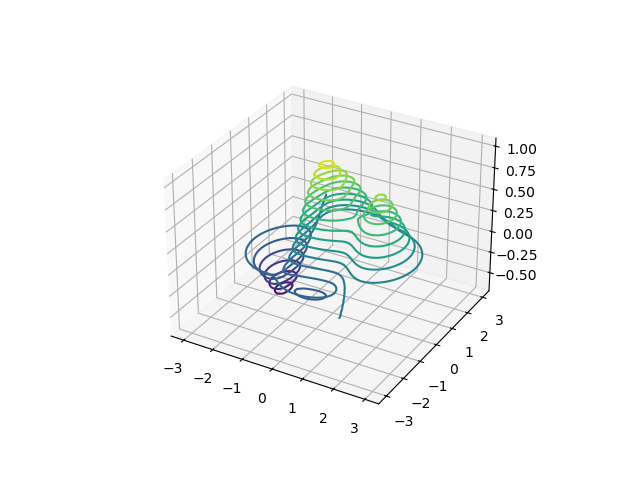

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour(X, Y, f(X,Y), 20)

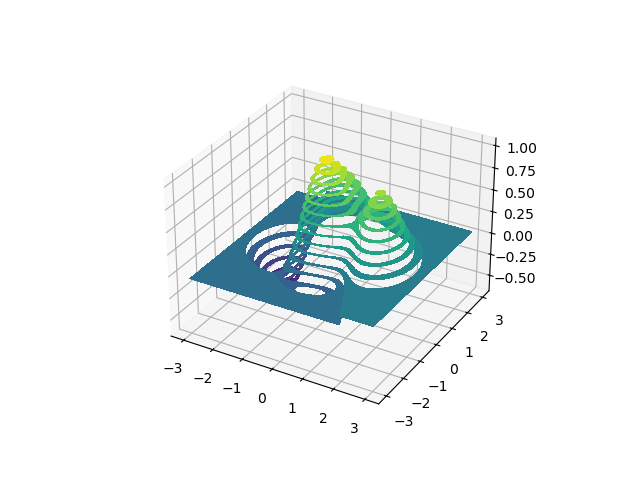

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contourf(X, Y, f(X,Y), 20)

## Actividad

Se desea obtener el siguiente gráfico

 <img src="./00_campo_electrico.png"
      alt="Campo eléctrico"
        width="600"> 

en donde se está graficando:

1. El campo eléctrico (campo vectorial) dado por

$$ \mathbf{E} = \sum_{i=1}^2 q_i \frac{\mathbf{r} - \mathbf{r}_i}{\Vert \mathbf{r}\Vert^3}\, .$$

2. La magnitud del campo eléctrico (campo escalar) como mapa de colores.

Las posiciones de las partículas son: $(-1, 0)$ y $(1, 0)$. Sus cargas son $q_1 = 1$ y $q_2=-1$.

## Recursos adicionales

1. Nicolas Rougier, Mike Müller, Gaël Varoquaux (2025). [Matplotlib: plotting](https://scipy-lectures.org/intro/matplotlib/index.html) en Scipy Lecture Notes. Acceso: agosto de 2025.
2. Equipo de desarrollo de Matplotlib (2025) [Galería](https://matplotlib.org/gallery/index.html) en Matplotlib Documentation. Acceso: agosto de 2025.